In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Flatten, Dense
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#based on https://www.kaggle.com/code/pankul/image-classification-w-vgg16-weights
IMAGE_SIZE = [100, 100]  
batch_size = 64
nb_epochs = 10
train_data_dir = '../input/fruits/fruits-360_dataset/fruits-360/Training'
test_data_dir = '../input/fruits/fruits-360_dataset/fruits-360/Test'

# getting the number of classes i.e. type of fruits
folders = glob(train_data_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

datagen = ImageDataGenerator(rescale=1./255,preprocessing_function=preprocess_input)

train_gen = datagen.flow_from_directory(train_data_dir, target_size = IMAGE_SIZE, batch_size = batch_size, class_mode = 'categorical')
test_gen = datagen.flow_from_directory(test_data_dir, target_size = IMAGE_SIZE, batch_size = batch_size, class_mode = 'categorical')

Total Classes = 131
Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [3]:
# loading the weights of ResNet50 without the top layer. These weights are trained on Imagenet dataset.
vgg = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(1024, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = x)

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

2022-12-05 17:23:27.451527: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 17:23:27.536944: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 17:23:27.537929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 17:23:27.540256: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 4s 0us/step


In [4]:
earlystop = EarlyStopping(
    monitor='val_acc',
    min_delta=0.005,
    patience=5,
    verbose=1,
)

In [5]:
history = model.fit(train_gen,  
                   epochs = 30,  
                   validation_data = test_gen,
                   callbacks=[earlystop,]) 

2022-12-05 17:23:36.478063: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-12-05 17:23:40.377005: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1058/1058 [==============================] - 405s 375ms/step - loss: 2.8956 - acc: 0.2681 - val_loss: 2.0359 - val_acc: 0.4746
Epoch 2/30
1058/1058 [==============================] - 123s 116ms/step - loss: 1.2724 - acc: 0.6050 - val_loss: 1.5032 - val_acc: 0.6056
Epoch 3/30
1058/1058 [==============================] - 123s 116ms/step - loss: 0.8488 - acc: 0.7269 - val_loss: 1.3209 - val_acc: 0.6515
Epoch 4/30
1058/1058 [==============================] - 126s 119ms/step - loss: 0.6121 - acc: 0.7985 - val_loss: 1.3209 - val_acc: 0.6623
Epoch 5/30
1058/1058 [==============================] - 128s 120ms/step - loss: 0.4810 - acc: 0.8410 - val_loss: 1.1240 - val_acc: 0.6990
Epoch 6/30
1058/1058 [==============================] - 131s 124ms/step - loss: 0.4032 - acc: 0.8660 - val_loss: 1.0648 - val_acc: 0.7442
Epoch 7/30
1058/1058 [==============================] - 130s 123ms/step - loss: 0.3568 - acc: 0.8802 - val_loss: 1.0340 - val_acc: 0.7437
Epoch 8/30
1058/1058 [=======================

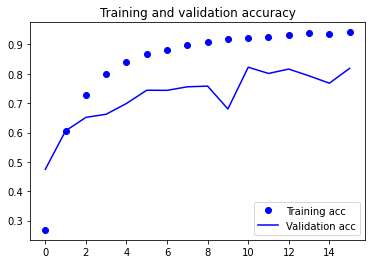

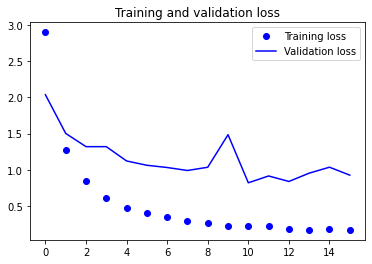

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()